# Can I download the entire TRILEGAL set for all OpSim fields? 

This would significantly speed up the runs on Quest, if I could just have a database to read from!

In [1]:
import pandas as pd
import numpy as np

import sys
import os
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code/vespa_update')
from vespa_update import trilegal as trilegal_update
from TRILEGAL import TRILEGAL
from OpSim import OpSim

print(os.environ['PATH'])

/Users/ageller/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2336: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


/Volumes/highnoon2go/highnoon/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/vespa_update:/Users/ageller/anaconda3/bin:/Users/ageller/anaconda3/condabin:/Users/ageller/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/share/dotnet:/opt/X11/bin:~/.dotnet/tools:/Library/Frameworks/Mono.framework/Versions/Current/Commands


In [2]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [43]:
head = pd.read_csv('outputFilesHead.csv')
Nmax = 5e5 #maximum number of stars that we want from TRILEGAL
area0 = np.pi*(3.5/2.)**2. #square degrees (LSST FoV)

for i in range(len(OpS.Nobs)):
    if (OpS.Nobs[i] > 0):

        galaxy = TRILEGAL()
        galaxy.RA = OpS.RA[i]
        galaxy.Dec = OpS.Dec[i]
        galaxy.fieldID = OpS.fieldID[i]
        galaxy.tmpfname = 'TRILEGAL_model_fID_'+str(int(OpS.fieldID[i]))+'.h5'
        galaxy.tmpdir = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/'
        #having trouble getting these
#         if (int(OpS.fieldID[i]) != 1757):
#         if (int(OpS.fieldID[i]) != 1322 and int(OpS.fieldID[i]) != 1430 and int(OpS.fieldID[i]) != 1541 \
#         and int(OpS.fieldID[i]) != 1562 and int(OpS.fieldID[i]) != 1563 and int(OpS.fieldID[i]) != 1642 \
#         and int(OpS.fieldID[i]) != 1668 and int(OpS.fieldID[i]) != 1756 and int(OpS.fieldID[i]) != 1757 \
#         and int(OpS.fieldID[i]) != 1779 and int(OpS.fieldID[i]) != 1880 and int(OpS.fieldID[i]) != 1889 \
#         and int(OpS.fieldID[i]) != 2000 and int(OpS.fieldID[i]) != 2011 and int(OpS.fieldID[i]) != 2331 \
#         and int(OpS.fieldID[i]) != 2447 and int(OpS.fieldID[i]) != 2779 and int(OpS.fieldID[i]) != 2891\
#         and int(OpS.fieldID[i]) != 2993 and int(OpS.fieldID[i]) != 2994 and int(OpS.fieldID[i]) != 4203):
        if (not os.path.exists(os.path.join(galaxy.tmpdir, galaxy.tmpfname))):
            #find the number of expected stars
            #reduce the area if needed so that we don't download more that Nmax stars
            headVal = head.loc[(head['OpSimID'] == OpS.fieldID[i])]
            if (len(headVal.index) > 0):
                print("expected Nstars = ",headVal['NstarsTRILEGAL'].iloc[0])
                if (headVal['NstarsTRILEGAL'].iloc[0] > Nmax):
                    galaxy.area = area0*(Nmax/headVal['NstarsTRILEGAL'].iloc[0])**2.

                    print("reducing area to", galaxy.area)
            else:
                print('dont have OpSim field in header ', OpS.fieldID[i], len(headVal.index))

            galaxy.downloadModel()
            #else:
                #print(galaxy.tmpfname, "already exists")

print('done')

expected Nstars =  27068.734515498414
downloading model TRILEGAL_model_fID_1757.h5 0.8


KeyboardInterrupt: 

# Should I try to reduce the size of many of these somehow?

maybe I can gzip them (does that reduce the size considerably?), and then upack to read in python?

In [2]:


from astropy.coordinates import SkyCoord
from astropy import units, constants

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f1 = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/grid/test.trilegal.GC.h5'
df = pd.read_hdf(f1)
#df2 = pd.read_hdf('grid/test.trilegal.GC.rband.h5')
f2 = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/TRILEGAL_model_fID_1.h5'
df2 = pd.read_hdf(f2)

In [4]:
area = 0.

with pd.HDFStore(f1) as store:
    attrs = store.get_storer('df').attrs
    print(attrs.trilegal_args)
with pd.HDFStore(f2) as store:
    attrs = store.get_storer('df').attrs
    if ('area' in attrs.trilegal_args):
        area = float(attrs.trilegal_args['area'])
    print(attrs.trilegal_args)
print(area)

{'version': '1.6', 'ra': 270.0, 'dec': -29, 'l': 1.5439368675677592, 'b': -2.741151563920792, 'area': 0.1, 'AV': 2.227, 'sigma_AV': 0.1, 'filterset': 'lsst', 'maglim': 26, 'binaries': False}
{'version': '1.6', 'ra': 0.0, 'dec': -90.0, 'l': 302.9319252554167, 'b': -27.12825241496801, 'area': 9.62112750161874, 'AV': 0.504, 'sigma_AV': 0.1, 'filterset': 'lsst', 'maglim': 25, 'maglimFilter': 3, 'binaries': False}
9.62112750161874


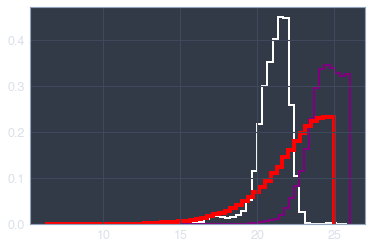

In [6]:
f, ax = plt.subplots()
_ = ax.hist(df['r_mag'], bins=50, histtype='step', color='white', linewidth=2, density=True)
_ = ax.hist(df['u_mag'], bins=50, histtype='step', color='purple', linewidth=2, density=True)
_ = ax.hist(df2['r_mag'], bins=50, histtype='step', color='red', linewidth=4, density=True)
#ax.set_yscale('log')